## <center> Collaborative Filtering Based Movie Recommendation System

Movie Runner is a model that recommends 10 movies to be liked by each person, based on their rating for movies. 

Netflix Prize Data was used as a dataset. At the same time, the movies we watched and rated were added to the dataset. 

Collaborative Filtering algorithm is used with the help of SVD (Singular Value Decomposition)  method. Similar users and similar movies are detected by the algorithm by assigning a vector to all movies and users. Then, movies liked by users with the same movie taste are recommended to the person. According to the answer to the question "How many points would he/she give it if he/she watched" the movies that each user has not watched before, it finds the points and the highest 10 scores, and recommends these movies to the user.

## **Data Pre-Processing**

In [101]:
import pandas as pd
import numpy as np 
import warnings

In [102]:
Titles = pd.read_csv('titles.csv', 
                           encoding = 'ISO-8859-1', header = None, 
                           names = ['Id', 'Year', 'Name']).set_index('Id')

Titles=Titles[0:4500]

In [103]:
print('Null Values in Year Column (if any):')
Titles[Titles['Year'].isnull()]

Null Values in Year Column (if any):


,Year,Name
Id,,


In [107]:
print('Null Values in Name Column (if any):')
Titles[Titles['Name'].isnull()]

Null Values in Name Column (if any):


,Year,Name
Id,,
4388,2001,NaN


In [108]:
print('Shape of Titles Dataset: ', Titles.shape)
Titles.head()

Shape of Titles Dataset:  (4501, 2)


,Year,Name
Id,,
Id,Year,Name
1,2003,Dinosaur Planet
2,2004,Isle of Man TT 2004 Review
3,1997,Character
4,1994,Paula Abdul's Get Up & Dance


In [109]:
df_raw = pd.read_csv('df_filtered.csv',usecols=['User','Rating','Movie'])
                      #header=None, names=[User,Rating,Movie'User', 'Rating'], usecols=[0, 1])

c:\users\inpt\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [110]:
#df_raw['Movie']=0

In [111]:
print('Shape of Netflix Ratings Raw Data: ',df_raw.shape)
df_raw.head()

Shape of Netflix Ratings Raw Data:  (2170557, 3)


,User,Rating,Movie
0,712664,5.0,3
1,603277,3.0,3
2,1650301,2.0,3
3,2312349,4.0,3
4,1977959,4.0,3


In [112]:
print("Number of Unique Movies: ",df_raw['Movie'].nunique())
print("Number of Unique Users: ",df_raw['User'].nunique())

Number of Unique Movies:  1466
Number of Unique Users:  10986


In [113]:
df_raw.reset_index(drop=True,inplace=True)
df_raw

,User,Rating,Movie
0,712664,5.0,3
1,603277,3.0,3
2,1650301,2.0,3
3,2312349,4.0,3
4,1977959,4.0,3
...,...,...,...
2170552,Gizem,1.0,2699
2170553,Gizem,1.0,2395
2170554,Gizem,1.0,1832
2170555,Gizem,1.0,361


In [114]:
print('Shape of User-Ratings Table: ',df_raw.shape)

Shape of User-Ratings Table:  (2170557, 3)


In [116]:
min_movie_ratings = 1500

filter_movies = (df_raw['Movie'].value_counts()>min_movie_ratings)
filter_movies = filter_movies[filter_movies].index.tolist()

filter_movies[:10]

[4306, 1905, 2862, 2452, 607, 798, 2782, 1798, 3106, 571]

In [117]:
min_user_ratings = 325

filter_users = (df_raw['User'].value_counts()>min_user_ratings)
filter_users = filter_users[filter_users].index.tolist()

filter_users[:5]

[305344, 387418, 2439493, 2118461, 1664010]

In [118]:
df_filtered = df_raw[(df_raw['Movie'].isin(filter_movies)) & (df_raw['User'].isin(filter_users))]

df_filtered.reset_index(drop=True,inplace=True)

In [119]:
print('Shape of Unfiltered User-Ratings Table: ',df_raw.shape)
print('Shape of Filtered User-Ratings Table: ',df_filtered.shape)

Shape of Unfiltered User-Ratings Table:  (2170557, 3)
Shape of Filtered User-Ratings Table:  (1075417, 3)


In [123]:
print("Number of Unique Movies: ",df_filtered['Movie'].nunique())
print("Number of Unique Users: ",df_filtered['User'].nunique())

Number of Unique Movies:  507
Number of Unique Users:  3782


In [124]:
df_filtered

,User,Rating,Movie
0,712664,4.0,18
1,1907667,4.0,18
2,306466,4.0,18
3,1276913,4.0,18
4,1744889,3.0,18
...,...,...,...
1075412,442222,4.0,4345
1075413,2633357,4.0,4345
1075414,1385356,1.0,4345
1075415,633738,2.0,4345


## **SVD Model (Singular Value Decomposition)**

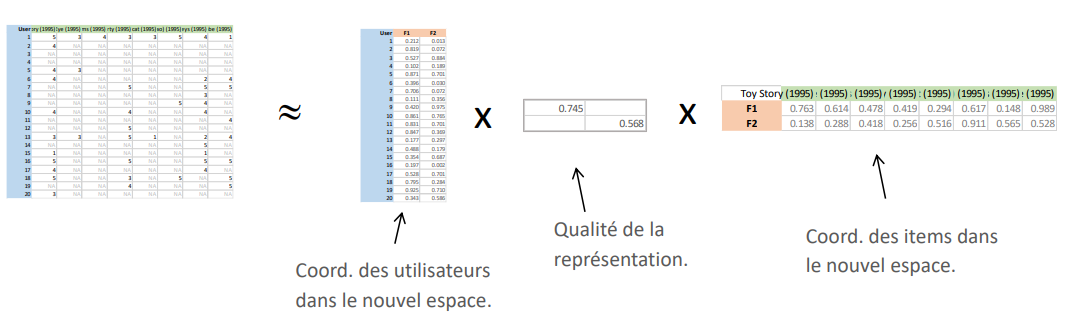

In [128]:
!pip install surprise

You should consider upgrading via the 'c:\users\inpt\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


Using legacy 'setup.py install' for scikit-surprise, since package 'wheel' is not installed.
    Running setup.py install for scikit-surprise: started
    Running setup.py install for scikit-surprise: finished with status 'done'


In [136]:
from surprise import SVD
from surprise import accuracy
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV

In [137]:
reader = Reader(rating_scale=(1, 5))

In [138]:
#subdata = Dataset.load_from_df(df_filtered[['User', 'Movie', 'Rating']].sample(500000), reader)

In [139]:
#param_grid = {'n_epochs': [20, 40], 'lr_all': [0.001, 0.005, 0.01],
              #'reg_all': [0.01, 0.02, 0.05],'n_factors':[50,100]}

In [140]:
#gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

#gs.fit(subdata)

In [141]:
#print("Best RMSE Socre:",gs.best_score['rmse'])
#print("Best Parameters:",gs.best_params['rmse'])

In [142]:
data = Dataset.load_from_df(df_filtered[['User', 'Movie', 'Rating']], reader)

trainset, testset = train_test_split(data, test_size=.20)

In [143]:
help(SVD)

Help on class SVD in module surprise.prediction_algorithms.matrix_factorization:

class SVD(surprise.prediction_algorithms.algo_base.AlgoBase)
 |  SVD(n_factors=100, n_epochs=20, biased=True, init_mean=0, init_std_dev=0.1, lr_all=0.005, reg_all=0.02, lr_bu=None, lr_bi=None, lr_pu=None, lr_qi=None, reg_bu=None, reg_bi=None, reg_pu=None, reg_qi=None, random_state=None, verbose=False)
 |  
 |  The famous *SVD* algorithm, as popularized by `Simon Funk
 |  <http://sifter.org/~simon/journal/20061211.html>`_ during the Netflix
 |  Prize. When baselines are not used, this is equivalent to Probabilistic
 |  Matrix Factorization :cite:`salakhutdinov2008a` (see :ref:`note
 |  <unbiased_note>` below).
 |  
 |  The prediction :math:`\hat{r}_{ui}` is set as:
 |  
 |  .. math::
 |      \hat{r}_{ui} = \mu + b_u + b_i + q_i^Tp_u
 |  
 |  If user :math:`u` is unknown, then the bias :math:`b_u` and the factors
 |  :math:`p_u` are assumed to be zero. The same applies for item :math:`i`
 |  with :math:`b_i

In [132]:
algo=SVD(n_factors=100, n_epochs=30, biased=True,
         lr_all=0.005, reg_all=0.035)

In [133]:
algo.fit(trainset)

In [134]:
pred_testset = algo.test(testset)
print(accuracy.rmse(pred_testset))

RMSE: 0.8058
0.8058429097414259


In [135]:
pred_testset[:5]

[Prediction(uid=1851867, iid=299, r_ui=4.0, est=3.8295011212967855, details={'was_impossible': False}),
 Prediction(uid=1854658, iid=723, r_ui=4.0, est=3.9149140171695986, details={'was_impossible': False}),
 Prediction(uid=1409104, iid=3962, r_ui=3.0, est=4.297663710586367, details={'was_impossible': False}),
 Prediction(uid=1238184, iid=4147, r_ui=1.0, est=2.437698672142924, details={'was_impossible': False}),
 Prediction(uid=1407746, iid=528, r_ui=2.0, est=2.059366990695581, details={'was_impossible': False})]

## **Movie Recommendations**


In [144]:
from collections import defaultdict

In [145]:
data = Dataset.load_from_df(df_filtered[['User', 'Movie', 'Rating']], reader)

In [146]:
all_data = data.build_full_trainset()

data_toPredict = all_data.build_anti_testset()

In [147]:
data_toPredict

[(712664, 28, 3.4259017664775615),
 (712664, 30, 3.4259017664775615),
 (712664, 44, 3.4259017664775615),
 (712664, 58, 3.4259017664775615),
 (712664, 83, 3.4259017664775615),
 (712664, 108, 3.4259017664775615),
 (712664, 111, 3.4259017664775615),
 (712664, 148, 3.4259017664775615),
 (712664, 166, 3.4259017664775615),
 (712664, 187, 3.4259017664775615),
 (712664, 189, 3.4259017664775615),
 (712664, 223, 3.4259017664775615),
 (712664, 232, 3.4259017664775615),
 (712664, 252, 3.4259017664775615),
 (712664, 257, 3.4259017664775615),
 (712664, 269, 3.4259017664775615),
 (712664, 270, 3.4259017664775615),
 (712664, 273, 3.4259017664775615),
 (712664, 285, 3.4259017664775615),
 (712664, 290, 3.4259017664775615),
 (712664, 299, 3.4259017664775615),
 (712664, 305, 3.4259017664775615),
 (712664, 311, 3.4259017664775615),
 (712664, 313, 3.4259017664775615),
 (712664, 334, 3.4259017664775615),
 (712664, 353, 3.4259017664775615),
 (712664, 361, 3.4259017664775615),
 (712664, 393, 3.4259017664775615

In [69]:
predictions = algo.test(data_toPredict)

In [70]:
predictions[:5]

[Prediction(uid='712664', iid=8, r_ui=3.391228758748024, est=3.224241309594196, details={'was_impossible': False}),
 Prediction(uid='712664', iid=16, r_ui=3.391228758748024, est=3.106865512742301, details={'was_impossible': False}),
 Prediction(uid='712664', iid=17, r_ui=3.391228758748024, est=2.477379846524379, details={'was_impossible': False}),
 Prediction(uid='712664', iid=28, r_ui=3.391228758748024, est=3.4454537478409564, details={'was_impossible': False}),
 Prediction(uid='712664', iid=30, r_ui=3.391228758748024, est=2.97709381826657, details={'was_impossible': False})]

In [71]:
def top_movies(predictions, n=10):

    recommended = defaultdict(list)

    for userid, movieid, _ , estimation, _ in predictions:
        recommended[userid].append((movieid, estimation))

    for userid, user_ratings in recommended.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        recommended[userid] = user_ratings[:n]

    return recommended

In [72]:
recommended = top_movies(predictions, n=10)

In [73]:
recommended['Furkan']

[(1476, 5),
 (3456, 5),
 (3928, 5),
 (4353, 4.979168956109944),
 (1409, 4.8629671025717),
 (1395, 4.807621964518478),
 (199, 4.788616936493417),
 (1915, 4.778592463694775),
 (3888, 4.758923235360246),
 (4306, 4.734359938908458)]

In [74]:
[movieid for (movieid, estimation) in recommended['93124']]

[3456, 2568, 3446, 3290, 1994, 907, 3965, 4383, 1357, 2102]

In [75]:
def show_all_recommendations():
  for userid, user_ratings in recommended.items():
      print('User:', userid, '-- Recommended Movies:', [movieid for (movieid, estimation) in user_ratings])


In [76]:
show_all_recommendations()

Streaming output truncated to the last 5000 lines.
User: 1704248 -- Recommended Movies: [2057, 3456, 4098, 359, 3078, 3769, 2942, 270, 2585, 2114]
User: 2523912 -- Recommended Movies: [1915, 32, 3456, 4427, 3928, 2927, 2162, 2603, 2300, 2942]
User: 1279012 -- Recommended Movies: [2102, 3456, 2172, 4427, 2195, 634, 4115, 3444, 1495, 1020]
User: 383451 -- Recommended Movies: [3456, 1476, 4427, 2405, 2102, 3928, 4238, 3769, 2019, 1947]
User: 1479892 -- Recommended Movies: [3456, 2162, 3523, 2040, 463, 4207, 2568, 1395, 752, 2172]
User: 199435 -- Recommended Movies: [477, 4115, 889, 3354, 2456, 1300, 3348, 4011, 1476, 1770]
User: 2316337 -- Recommended Movies: [1915, 1409, 1222, 3456, 1800, 2754, 2405, 2548, 3521, 1790]
User: 1123175 -- Recommended Movies: [3456, 985, 2162, 2463, 3949, 4207, 385, 551, 32, 2927]
User: 2274452 -- Recommended Movies: [1642, 1291, 3456, 4207, 1856, 3949, 463, 2102, 504, 2129]
User: 2147714 -- Recommended Movies: [4427, 2102, 722, 3662, 907, 634, 2754, 4054, 27

In [77]:
def Recommend_Movies(User):
  
  print('**Recommended Movies for User ' + User + ':**')
  print()
  order=1

  for movie_est in recommended[User]:
    print(str(order)+')',Titles.loc[movie_est[0],'Name'], '(' + str(Titles.loc[movie_est[0],'Year']) + ')')
    order+=1


In [78]:
Recommend_Movies('93124')

**Recommended Movies for User 93124:**

1) Lost: Season 1 (2004)
2) Stargate SG-1: Season 8 (2004)
3) Spirited Away (2002)
4) The Godfather (1974)
5) The L Word: Season 2 (2005)
6) Animal Crackers (1930)
7) Red Dwarf: Series 5 (1992)
8) Farscape: The Peacekeeper Wars (2004)
9) Stargate SG-1: Season 7 (2003)
10) The Simpsons: Season 6 (1994)


In [79]:
Recommend_Movies('Furkan')

**Recommended Movies for User Furkan:**

1) Six Feet Under: Season 4 (2004)
2) Lost: Season 1 (2004)
3) Nip/Tuck: Season 2 (2004)
4) Curb Your Enthusiasm: Season 3 (2002)
5) The O.C.: Season 1 (2003)
6) Charade (1963)
7) The Deer Hunter (1978)
8) Law & Order: Special Victims Unit: The Second Year (2000)
9) NYPD Blue: Season 2 (1994)
10) The Sixth Sense (1999)


In [80]:
Recommend_Movies('Gizem')

**Recommended Movies for User Gizem:**

1) The Best of Friends: Vol. 4 (1994)
2) The Best of Friends: Season 1 (1994)
3) The Best of Friends: Season 2 (1994)
4) Sex and the City: Season 4 (2001)
5) The O.C.: Season 1 (2003)
6) Everybody Loves Raymond: Season 1 (1996)
7) Alias: Season 4 (2005)
8) The American President (1995)
9) Gilmore Girls: Season 1 (2000)
10) Sleepless in Seattle (1993)


In [81]:
Recommend_Movies('Cihan')

**Recommended Movies for User Cihan:**

1) The Ghost and Mrs. Muir (1947)
2) Charade (1963)
3) The O.C.: Season 1 (2003)
4) I Want to Live! (1958)
5) Gilmore Girls: Season 3 (2002)
6) Fly Away Home (1996)
7) On Golden Pond (1981)
8) Little House on the Prairie: Season 2 (1975)
9) Little House on the Prairie: Season 3 (1976)
10) The Golden Girls: Season 1 (1985)
